**Case Study: Hospital Lenght of Stay (LOS) Prediction

**Context**: Hospital management is a vital area that gained a lot of attention during the covid-19 pandemic. Inefficient resources like beds, ventilators might lead to a lot of complications. However, this can be mitigated by **predicting the lenght of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chance of recovery. The rooms and bed can also be planned in accordance with that.

**HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system**. They have been unsucessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the lenght of stay (LOS) of a patient can solve this problem to a great extent.**

**Objective**: Find out what factors affect the LOS the most and come up with a machine learning model which can predict the LOS of a patient using the data available during admission and after running a few tests. Also, bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and their revenue.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('./data/healthcare_data.csv')
data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  500000 non-null  object 
 11  Visitors with Patient              5000

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
patientid,500000.0,63150.519058,41689.479956,-3269.000000,25442.000000,57864.000000,103392.000000,134400.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


In [19]:
data.isnull().sum() / data.shape[0] * 100

Available Extra Rooms in Hospital    0.0
Department                           0.0
Ward_Facility_Code                   0.0
doctor_name                          0.0
staff_available                      0.0
patientid                            0.0
Age                                  0.0
gender                               0.0
Type of Admission                    0.0
Severity of Illness                  0.0
health_conditions                    0.0
Visitors with Patient                0.0
Insurance                            0.0
Admission_Deposit                    0.0
Stay (in days)                       0.0
dtype: float64

In [20]:
data[data.duplicated()]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)


In [10]:
print('There are {} unique observations:'.format(data.nunique()))

There are Available Extra Rooms in Hospital        18
Department                                5
Ward_Facility_Code                        6
doctor_name                               9
staff_available                          11
patientid                            126399
Age                                      10
gender                                    3
Type of Admission                         3
Severity of Illness                       3
health_conditions                         6
Visitors with Patient                    28
Insurance                                 2
Admission_Deposit                    499508
Stay (in days)                           49
dtype: int64 unique observations



In [14]:
cat_variables = data[['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance']]
cat_variables

,Department,Ward_Facility_Code,doctor_name,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance
0,gynecology,D,Dr Sophia,41-50,Female,Trauma,Extreme,Diabetes,Yes
1,gynecology,B,Dr Sophia,31-40,Female,Trauma,Minor,Heart disease,No
2,gynecology,B,Dr Sophia,21-30,Female,Trauma,Extreme,Diabetes,Yes
3,gynecology,D,Dr Olivia,31-40,Female,Urgent,Moderate,None,No
4,anesthesia,E,Dr Mark,71-80,Male,Trauma,Moderate,Diabetes,No
...,...,...,...,...,...,...,...,...,...
499995,gynecology,F,Dr Sarah,11-20,Female,Trauma,Minor,High Blood Pressure,No
499996,gynecology,F,Dr Olivia,31-40,Female,Emergency,Moderate,Other,No
499997,gynecology,B,Dr Sarah,11-20,Female,Emergency,Moderate,High Blood Pressure,No
499998,radiotherapy,A,Dr John,61-70,Female,Trauma,Extreme,Diabetes,No


Department


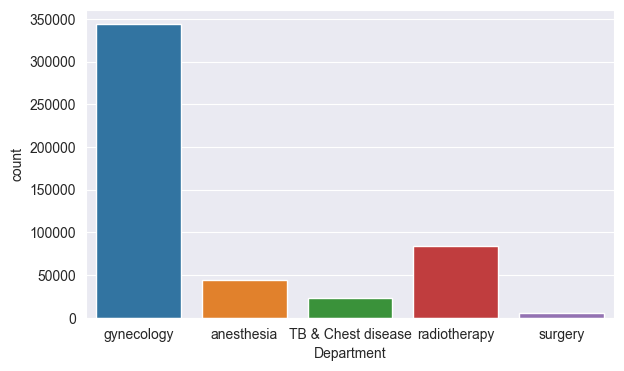

Ward_Facility_Code


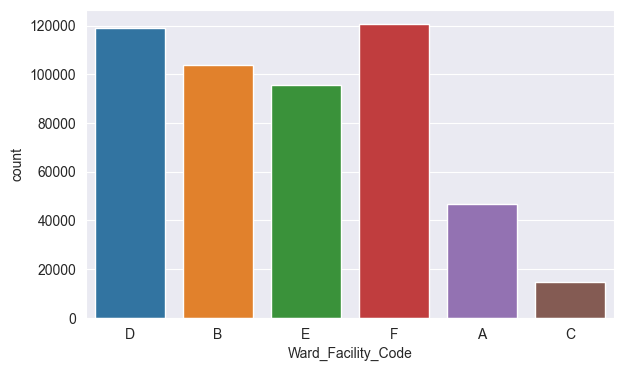

doctor_name


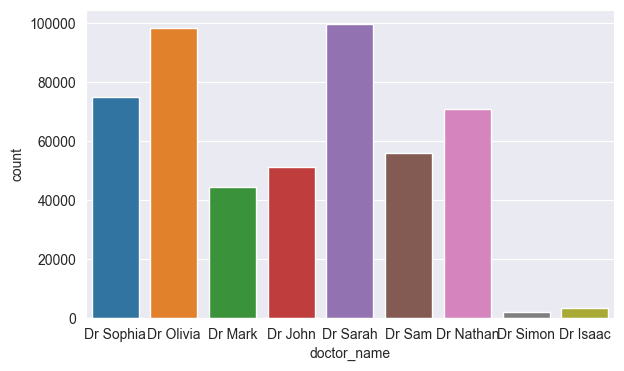

Age


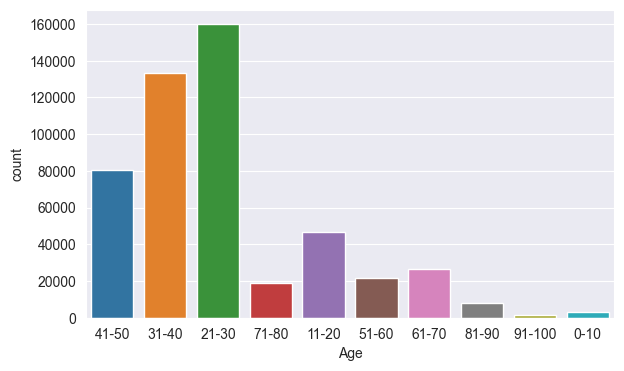

gender


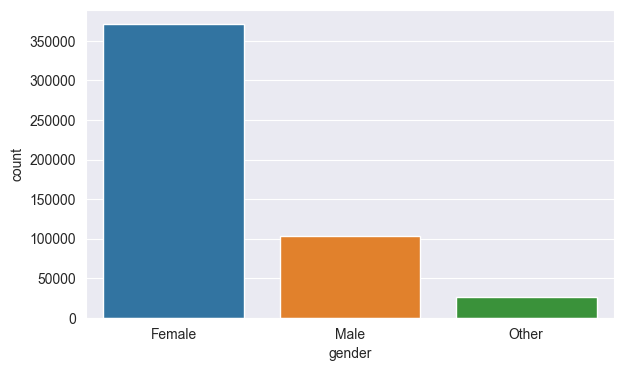

Type of Admission


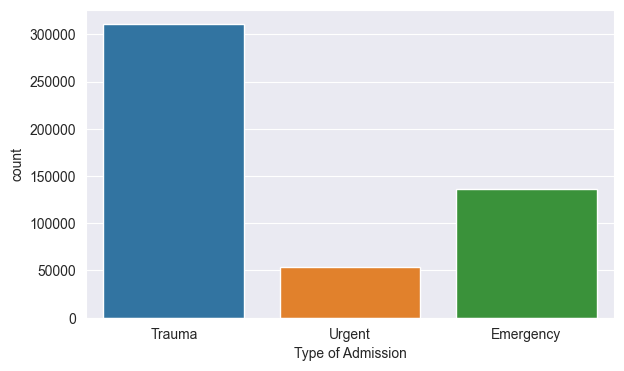

Severity of Illness


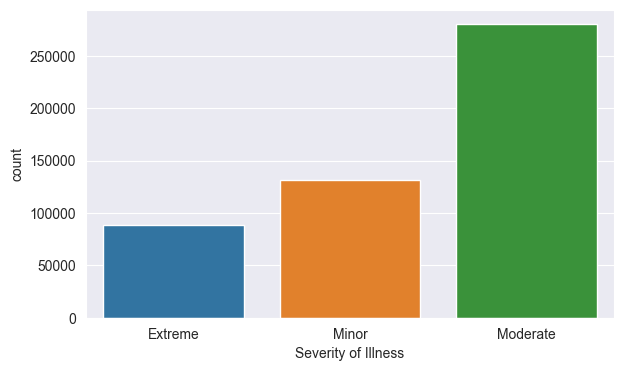

health_conditions


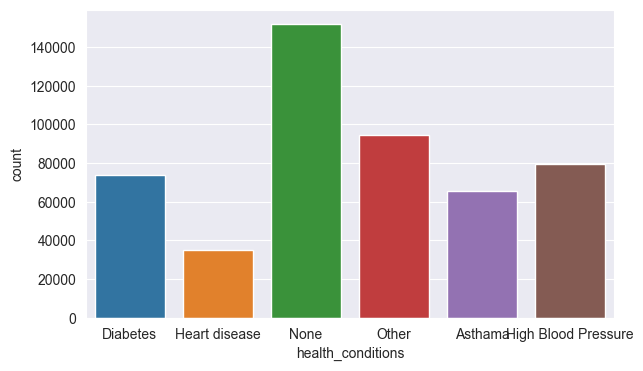

Insurance


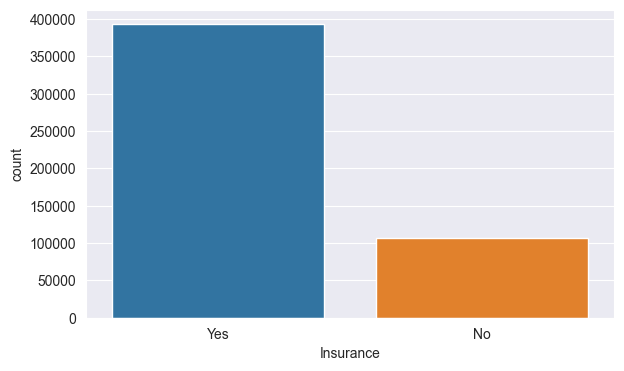

In [18]:
for col in cat_variables:
    print(col)
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(x=data[col])
    plt.show()

In [21]:
for col in cat_variables:
    print(data[col].value_counts(1))

gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: Department, dtype: float64
F    0.241076
D    0.238110
B    0.207770
E    0.190748
A    0.093102
C    0.029194
Name: Ward_Facility_Code, dtype: float64
Dr Sarah     0.199192
Dr Olivia    0.196704
Dr Sophia    0.149506
Dr Nathan    0.141554
Dr Sam       0.111422
Dr John      0.102526
Dr Mark      0.088820
Dr Isaac     0.006718
Dr Simon     0.003558
Name: doctor_name, dtype: float64
21-30     0.319586
31-40     0.266746
41-50     0.160812
11-20     0.093072
61-70     0.053112
51-60     0.043436
71-80     0.037406
81-90     0.016362
0-10      0.006736
91-100    0.002732
Name: Age, dtype: float64
Female    0.74162
Male      0.20696
Other     0.05142
Name: gender, dtype: float64
Trauma       0.621072
Emergency    0.271568
Urgent       0.107360
Name: Type of Admission, dtype: float64
Moderate    0.560394
Minor       0.263074
Extreme 

In [27]:
num_cat = data[['staff_available', 'Available Extra Rooms in Hospital', 'Stay (in days)', 'Visitors with Patient', 'Admission_Deposit']]
num_cat

,staff_available,Available Extra Rooms in Hospital,Stay (in days),Visitors with Patient,Admission_Deposit
0,0,4,8,4,2966.408696
1,2,4,9,2,3554.835677
2,8,2,7,2,5624.733654
3,7,4,8,4,4814.149231
4,10,2,34,2,5169.269637
...,...,...,...,...,...
499995,2,4,10,3,4105.795901
499996,8,13,11,2,4631.550257
499997,3,2,8,2,5456.930075
499998,1,2,23,2,4694.127772


staff_available


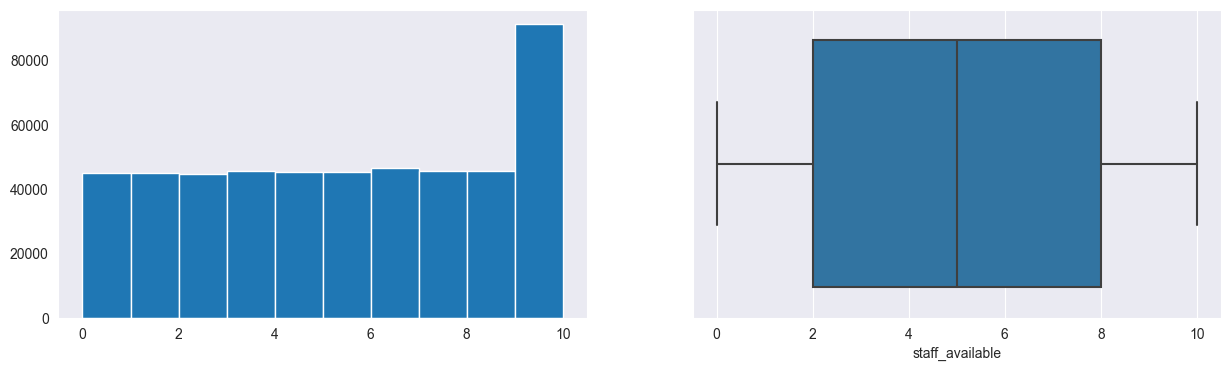

Available Extra Rooms in Hospital


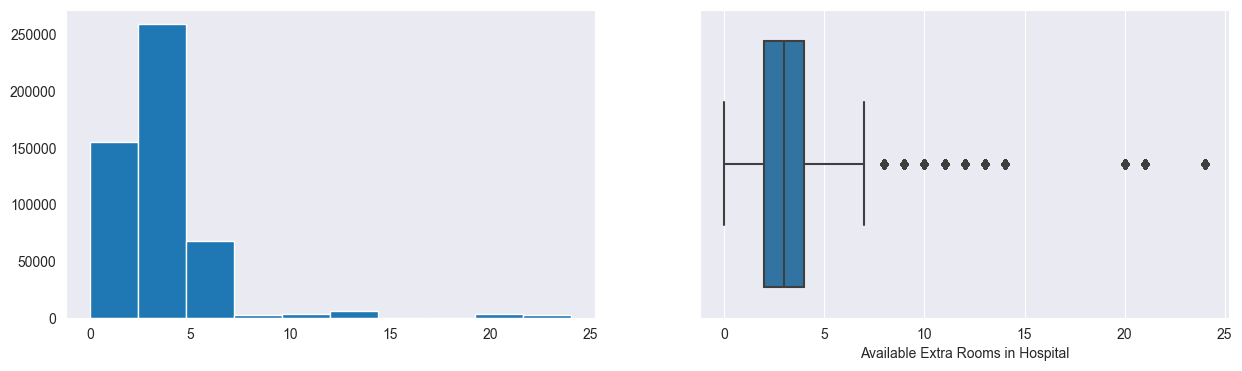

Stay (in days)


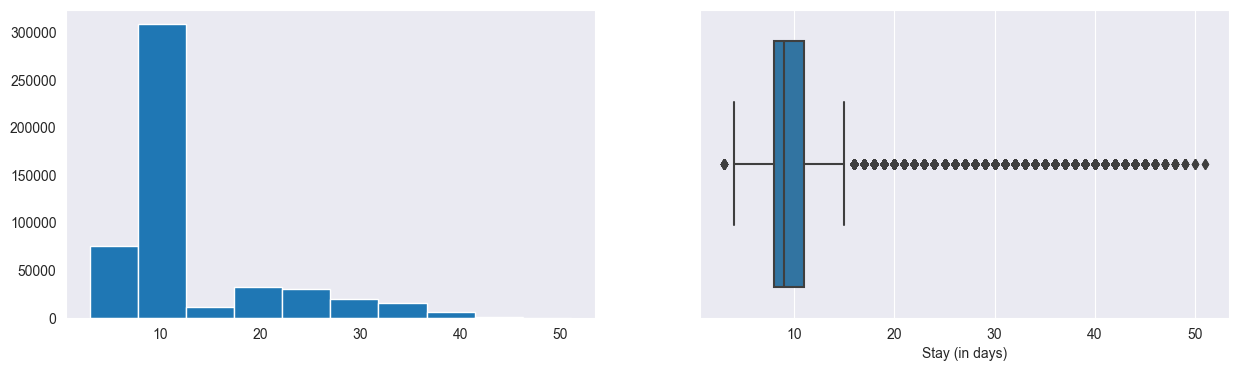

Visitors with Patient


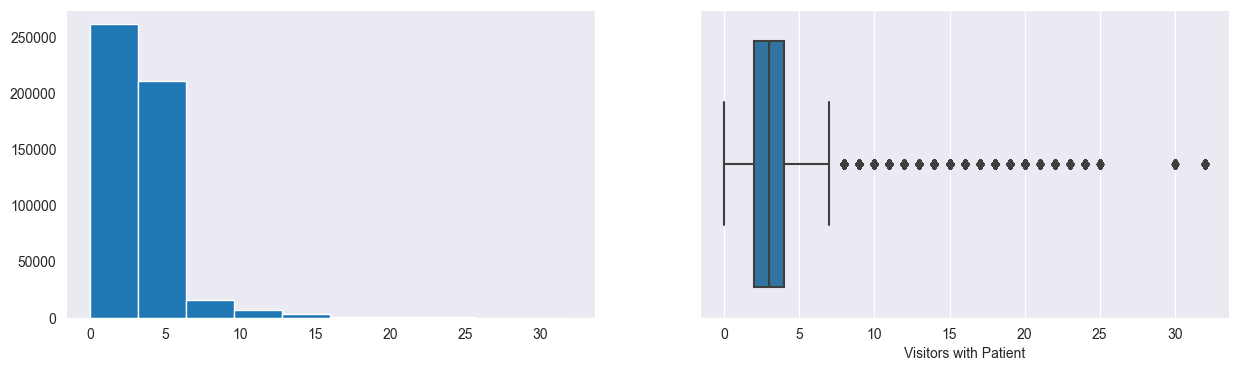

Admission_Deposit


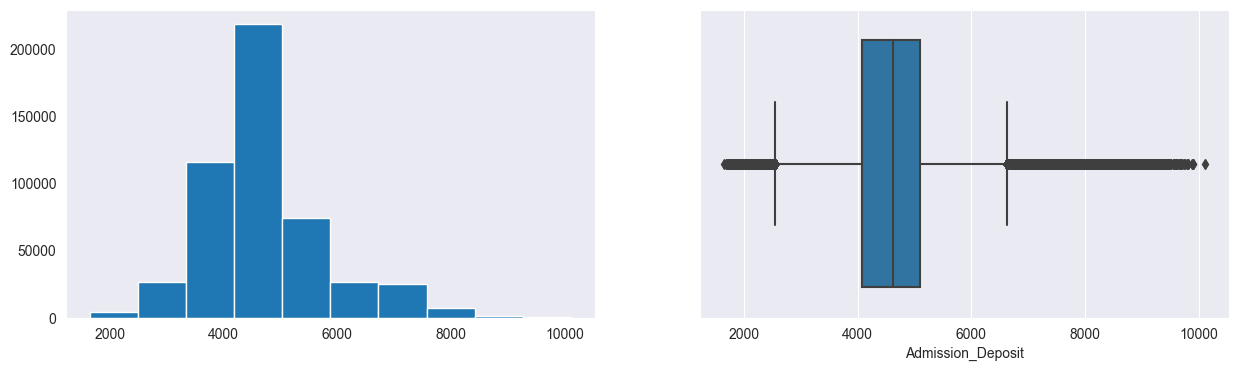

In [28]:
for col in num_cat:
    print(col)
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    num_cat[col].hist(bins=10, grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=num_cat[col])
    plt.show()

<Axes: xlabel='Stay (in days)', ylabel='Ward_Facility_Code'>

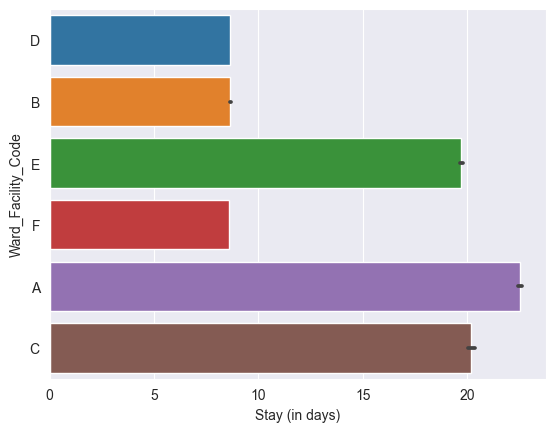

In [29]:
sns.barplot(y=data['Ward_Facility_Code'], x=data['Stay (in days)'], data=data)

In [30]:
data = pd.get_dummies(data, columns=data.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)
data

,Available Extra Rooms in Hospital,staff_available,patientid,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,...,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_None,health_conditions_Other,Insurance_Yes
0,4,0,33070,4,2966.408696,8,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
1,4,2,34808,2,3554.835677,9,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
2,2,8,44577,2,5624.733654,7,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
3,4,7,3695,4,4814.149231,8,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
4,2,10,108956,2,5169.269637,34,1,0,0,0,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,2,43001,3,4105.795901,10,0,1,0,0,...,1,0,1,0,0,0,1,0,0,0
499996,13,8,85601,2,4631.550257,11,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
499997,2,3,22447,2,5456.930075,8,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
499998,2,1,29957,2,4694.127772,23,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [31]:
data = data.drop(['patientid'], axis=1)

x= data.drop(['Stay (in days)'], axis=1)
y = data['Stay (in days)']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400000, 42), (100000, 42), (400000,), (100000,))

In [34]:
#Metrics:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
           "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test, y_train,y_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


In [35]:
import statsmodels.api as sm

x_train1 = sm.add_constant(X_train)
x_test1 = sm.add_constant(X_test)

olsmodel1 = sm.OLS(y_train, x_train1).fit()
olsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 5.643e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:07:54   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399961   BIC:                         2.050e+06
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.8918      0.055    359.659      0.000      19.783      20.000
Available Extra Rooms in Hospital         0.0786      0.002     42.311      0.000       0.075       0.082
staff_available                          -0.0009      0.002     -0.588      0.557      -0.004       0.002
Visitors with Patient                     0.0002      0.002      0.099      0.921      -0.004       0.005
Admission_Deposit                     -3.839e-05   4.78e-06     -8.029      0.000   -4.78e-05    -2.9e-05
Department_anesthesia                     6.0823      0.029    210.110      0.000       6.026       6.139
Department_gynecology                     0.4635      0.019     24.149      0.000       0.426       0.501
Department_radiotherapy                  -4.6217      0.037   -126.135      0.000      -4.693      -4.550
Department_surgery                        9.6867      0.044    218.475      0.000       9.600       9.774
Ward_Facility_Code_B                      0.2571      0.011     23.468      0.000       0.236       0.279
Ward_Facility_Code_C                      0.4349      0.035     12.604      0.000       0.367       0.503
Ward_Facility_Code_D                      0.2033      0.011     19.313      0.000       0.183       0.224
Ward_Facility_Code_E                      0.3087      0.021     14.409      0.000       0.267       0.351
Ward_Facility_Code_F                      0.0031      0.011      0.282      0.778      -0.018       0.025
doctor_name_Dr John                       7.2631      0.031    232.919      0.000       7.202       7.324
doctor_name_Dr Mark                       1.1949      0.033     36.394      0.000       1.131       1.259
doctor_name_Dr Nathan                    -0.2164      0.017    -12.662      0.000      -0.250      -0.183
doctor_name_Dr Olivia                    -0.3620      0.016    -22.985      0.000      -0.393      -0.331
doctor_name_Dr Sam                        1.2836      0.038     33.875      0.000       1.209       1.358
doctor_name_Dr Sarah                      0.8252      0.020     41.740      0.000       0.786       0.864
doctor_name_Dr Simon                      6.1602      0.069     89.051      0.000       6.025       6.296
doctor_name_Dr Sophia                     0.2167      0.020     10.605      0.000       0.177       0.257
Age_11-20                               -12.7378      0.065   -194.584      0.000     -12.866     -12.609
Age_21-30                               -10.4830      0.062   -168.463      0.000     -10.605     -10.361
Age_31-40                               -13.4354      0.062   -216.955      0.000     -13.557     -13.314
Age_41-50                               -13.5113      0.062   -216.833      0.000     -13.633     -13.389
Age_51-60

In [36]:
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144036,2.155759,0.84303,0.842962,19.676874


In [37]:
model_pref(olsmodel1, x_train1, x_test1, y_train, y_test)

    Data      RMSE       MAE       MAPE
0  Train  3.135092  2.146240  19.591781
1   Test  3.144036  2.155759  19.676874


In [38]:
#Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vi(train):
    vif = pd.DataFrame()
    vif['features'] = train.columns

    #calculating VIF for each feature
    vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    return vif

In [39]:
print(checking_vi(x_train1))

                                 features        VIF
0                                   const   0.000000
1       Available Extra Rooms in Hospital   1.023190
2                         staff_available   1.001928
3                   Visitors with Patient   1.029237
4                       Admission_Deposit   1.021080
5                   Department_anesthesia   2.737559
6                   Department_gynecology        inf
7                 Department_radiotherapy   7.650821
8                      Department_surgery        inf
9                    Ward_Facility_Code_B        inf
10                   Ward_Facility_Code_C   1.366866
11                   Ward_Facility_Code_D        inf
12                   Ward_Facility_Code_E   2.880783
13                   Ward_Facility_Code_F        inf
14                    doctor_name_Dr John        inf
15                    doctor_name_Dr Mark        inf
16                  doctor_name_Dr Nathan        inf
17                  doctor_name_Dr Olivia     

In [44]:
# create the model after dropping variables
x_train2 = x_train1.drop(['Insurance_Yes','staff_available','Visitors with Patient'] , axis=1)
x_test2 = x_test1.drop(['Insurance_Yes','staff_available','Visitors with Patient'] , axis=1)
# create the model
olsmodel2 = sm.OLS(y_train, x_train2).fit()
# get the model summary
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 6.127e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:14:56   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399964   BIC:                         2.050e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.8830      0.054    367.192      0.000      19.777      19.989
Available Extra Rooms in Hospital         0.0786      0.002     42.392      0.000       0.075       0.082
Admission_Deposit                     -3.843e-05   4.77e-06     -8.052      0.000   -4.78e-05   -2.91e-05
Department_anesthesia                     6.0823      0.029    210.151      0.000       6.026       6.139
Department_gynecology                     0.4614      0.019     24.233      0.000       0.424       0.499
Department_radiotherapy                  -4.6218      0.037   -126.176      0.000      -4.694      -4.550
Department_surgery                        9.6845      0.044    218.840      0.000       9.598       9.771
Ward_Facility_Code_B                      0.2563      0.011     23.447      0.000       0.235       0.278
Ward_Facility_Code_C                      0.4350      0.034     12.612      0.000       0.367       0.503
Ward_Facility_Code_D                      0.2027      0.010     19.348      0.000       0.182       0.223
Ward_Facility_Code_E                      0.3088      0.021     14.447      0.000       0.267       0.351
Ward_Facility_Code_F                      0.0024      0.011      0.223      0.823      -0.019       0.024
doctor_name_Dr John                       7.2605      0.031    234.529      0.000       7.200       7.321
doctor_name_Dr Mark                       1.1939      0.033     36.405      0.000       1.130       1.258
doctor_name_Dr Nathan                    -0.2169      0.017    -12.700      0.000      -0.250      -0.183
doctor_name_Dr Olivia                    -0.3626      0.016    -23.037      0.000      -0.393      -0.332
doctor_name_Dr Sam                        1.2826      0.038     33.877      0.000       1.208       1.357
doctor_name_Dr Sarah                      0.8247      0.020     41.732      0.000       0.786       0.863
doctor_name_Dr Simon                      6.1584      0.069     89.079      0.000       6.023       6.294
doctor_name_Dr Sophia                     0.2162      0.020     10.583      0.000       0.176       0.256
Age_11-20                               -12.7379      0.065   -194.592      0.000     -12.866     -12.610
Age_21-30                               -10.4831      0.062   -168.470      0.000     -10.605     -10.361
Age_31-40                               -13.4355      0.062   -216.958      0.000     -13.557     -13.314
Age_41-50                               -13.5114      0.062   -216.834      0.000     -13.633     -13.389
Age_51-60                                -0.3665      0.065     -5.651      0.000      -0.494      -0.239
Age_61-70                                -0.4217      0.064     -6.592      0.000      -0.547      -0.296
Age_71-80

In [45]:
lin_reg_test = model_performance_regression(olsmodel2, x_test2, y_test)
lin_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144035,2.155757,0.84303,0.842967,19.676878


In [46]:
model_pref(olsmodel2, x_train2, x_test2, y_train, y_test)

    Data      RMSE       MAE       MAPE
0  Train  3.135096  2.146234  19.591646
1   Test  3.144035  2.155757  19.676878


In [48]:
residual = olsmodel2.resid
residual

fitted = olsmodel2.fittedvalues
fitted

297504    10.838379
238029     9.470968
336929    33.267245
117602     9.630773
207386    23.027447
            ...    
491263     7.270213
267336    22.463556
470924    26.708575
491755     9.945892
128037     8.582115
Length: 400000, dtype: float64

In [49]:
# No heteroscedasticity
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F-statistics', 'p-value']
test = sms.het_goldfeldquandt(residual, x_train2)
lzip(name, test)

# As we can from the above test, the p-value is greater than 0.05. so we fail to reject the null-hypothesis. That means, residuals are homoscedastic.

[('F-statistics', 1.0039106858288325), ('p-value', 0.19142132359756808)]

In [50]:
coef = olsmodel2.params
coef

const                                    19.882991
Available Extra Rooms in Hospital         0.078613
Admission_Deposit                        -0.000038
Department_anesthesia                     6.082290
Department_gynecology                     0.461435
Department_radiotherapy                  -4.621785
Department_surgery                        9.684522
Ward_Facility_Code_B                      0.256348
Ward_Facility_Code_C                      0.435039
Ward_Facility_Code_D                      0.202650
Ward_Facility_Code_E                      0.308803
Ward_Facility_Code_F                      0.002437
doctor_name_Dr John                       7.260505
doctor_name_Dr Mark                       1.193884
doctor_name_Dr Nathan                    -0.216913
doctor_name_Dr Olivia                    -0.362561
doctor_name_Dr Sam                        1.282646
doctor_name_Dr Sarah                      0.824732
doctor_name_Dr Simon                      6.158436
doctor_name_Dr Sophia          

In [51]:
Equation = "Stay (in days)="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

Stay (in days)=	( 19.8829907826036 ) *  const + ( 0.07861348628794765 ) *  Available Extra Rooms in Hospital + ( -3.8429509533659515e-05 ) *  Admission_Deposit + ( 6.082290257916194 ) *  Department_anesthesia + ( 0.46143468993962683 ) *  Department_gynecology + ( -4.621785263664295 ) *  Department_radiotherapy + ( 9.684521739749725 ) *  Department_surgery + ( 0.2563475580161738 ) *  Ward_Facility_Code_B + ( 0.4350385786228466 ) *  Ward_Facility_Code_C + ( 0.2026501144164818 ) *  Ward_Facility_Code_D + ( 0.3088030119915389 ) *  Ward_Facility_Code_E + ( 0.0024370175069790214 ) *  Ward_Facility_Code_F + ( 7.260505074612579 ) *  doctor_name_Dr John + ( 1.1938837510421423 ) *  doctor_name_Dr Mark + ( -0.21691278170107933 ) *  doctor_name_Dr Nathan + ( -0.3625612321178378 ) *  doctor_name_Dr Olivia + ( 1.2826455272594814 ) *  doctor_name_Dr Sam + ( 0.8247318186162774 ) *  doctor_name_Dr Sarah + ( 6.15843614464316 ) *  doctor_name_Dr Simon + ( 0.21617688514225378 ) *  doctor_name_Dr Sophia + 

In [52]:
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, x_train2, y_train, cv=10)

cv_Score12 = cross_val_score(linearregression, x_train2, y_train, cv=10, scoring='neg_mean_squared_error')

print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.843 (+/- 0.004)
Mean Squared Error: 9.831 (+/- 0.296)


In [54]:
ridge = Ridge()
ridge.fit(X_train, y_train)
model_pref(ridge, X_train, X_test, y_train, y_test)

    Data      RMSE       MAE       MAPE
0  Train  3.135092  2.146301  19.592776
1   Test  3.144039  2.155819  19.677875


In [55]:
ridge_regression_perf_test = model_performance_regression(ridge, X_test, y_test)
ridge_regression_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144039,2.155819,0.84303,0.842964,19.677875


In [57]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

model_pref(dtree, X_train, X_test, y_train, y_test)

dt_regression_perf_test = model_performance_regression(dtree, X_test, y_test)
dt_regression_perf_test

    Data      RMSE      MAE      MAPE
0  Train  0.000000  0.00000  0.000000
1   Test  1.816425  1.12868  9.336789


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.816425,1.12868,0.947607,0.947585,9.336789


In [58]:
dtree_tuned = DecisionTreeRegressor(random_state=1)

parameters = {
    'max_depth': np.arange(2, 8), 'criterion': ['squared_error', 'friedman_mse'], 'min_samples_leaf': [1, 3, 5, 7], 'max_leaf_nodes': [2, 5, 7] + [None]
}

scorer = make_scorer(r2_score)

grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_tuned_regressor = grid_obj.best_estimator_
dtree_tuned_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=3, random_state=1)

In [59]:
dtree_tuned_regressor = model_performance_regression(dtree_tuned_regressor, X_test, y_test)
dtree_tuned_regressor

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.741743,1.161072,0.951826,0.951806,9.64668


In [60]:
features = list(x.columns)
importances = dtree_tuned_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'feature_importances_'

In [ ]:
bagging_estimator = BaggingRegressor(random_state=1)
bagging_estimator.fit(X_train, y_train)

bagging_estimator_perf_test = model_performance_regression(bagging_estimator, X_train, X_test, y_train, y_test)
bagging_estimator_perf_test

In [ ]:
bagging_tuned = BaggingRegressor(random_state=1)

parameters = {
    'n_estimators': [10, 15, 20],
    'max_samples': [0.8, 1],
    'max_features': [0.8, 1]
}

scorer = make_scorer(r2_score)

grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=scorer, cv=5)
grid_obj.fit(X_train, y_train)

bagging_tuned_regressor = grid_obj.best_estimator_
bagging_tuned_regressor.fit(X_train, y_train)

In [ ]:
bagging_tuned_regressor_perf_test = model_performance_regression(bagging_tuned_regressor, X_test, y_test)
bagging_tuned_regressor_perf_test

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

#Fitting the model
regressor.fit(X_train, y_train)

# Model Performance on test data i.e prediction
regressor_perf_test = model_performance_regression(regressor, X_test, y_test)

regressor_perf_test

In [ ]:
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [5, 7],
    "max_features": [0.8, 1]
             }

# Type of scoring used to compare parameter combinations
scorer = make_scorer(r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train,y_train)

# Set the rf_tuned_regressor to the best combination of parameters
rf_tuned_regressor = grid_obj.best_estimator_

rf_tuned_regressor.fit(X_train, y_train)

In [ ]:
# Model Performance on test data i.e prediction
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, X_test, y_test)

rf_tuned_regressor_perf_test

In [ ]:
#Plotting the feature importance
importances = rf_tuned_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()